(test-functions:cantilever-beam-2d)=
# Two-dimensional (2D) Cantilever Beam Reliability Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The 2D cantilever beam problem is a reliability test function from
{cite}`Rajashekhar1993`.
This is an often revisited problem in reliability analysis
(see, for instance, {cite}`Li2018`).

The plots of the function are shown below. The left plot shows the surface
plot of the performance function, the center plot shows the contour
plot with a single contour line at function value of $0.0$ (the limit-state
surface), and the right plot shows the same plot with $10^6$ sample points
overlaid.

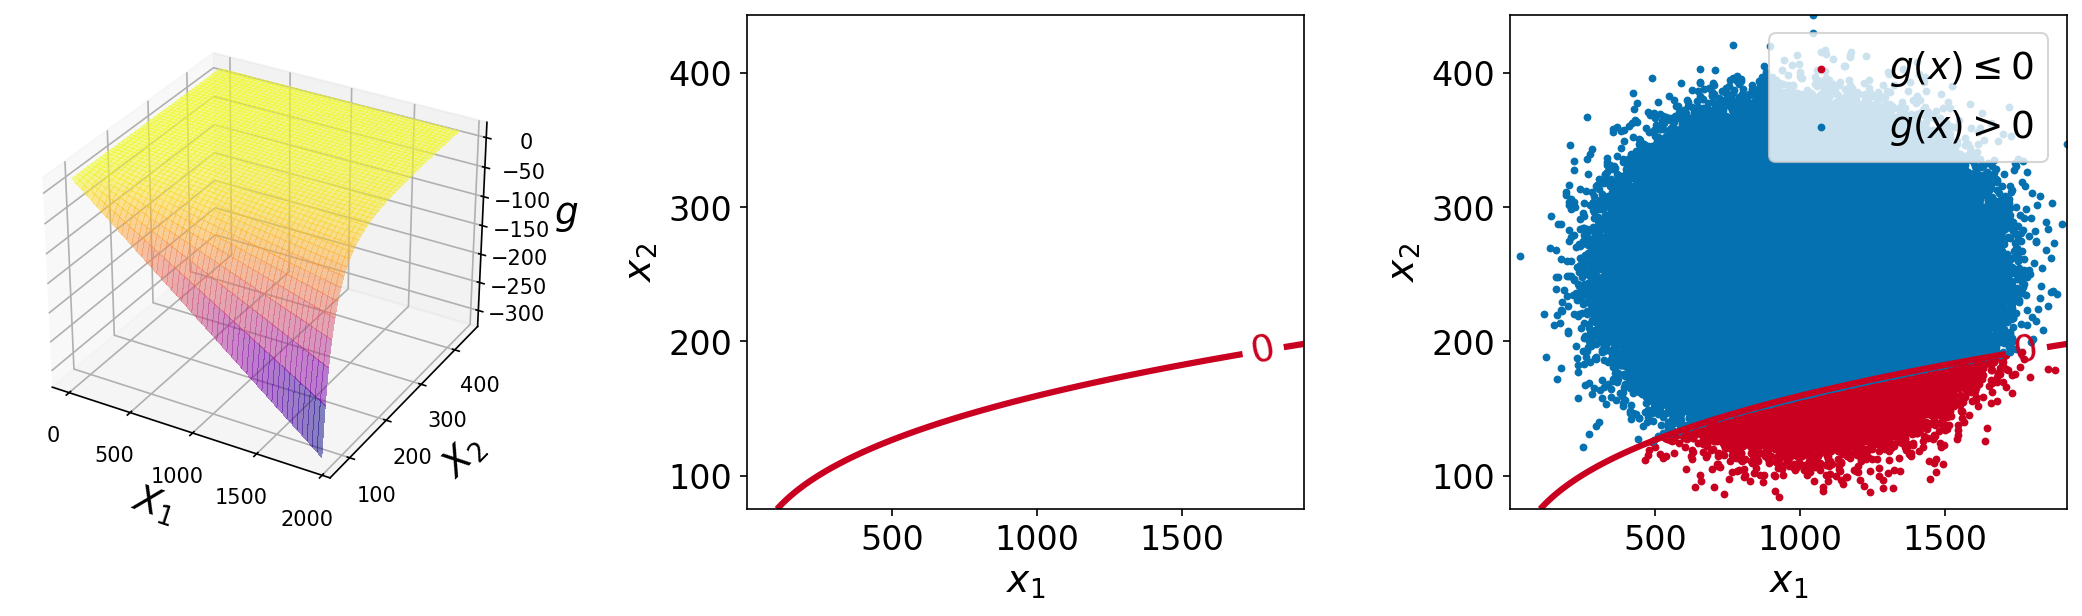

In [2]:
my_fun = uqtf.CantileverBeam2D()
my_fun.prob_input.reset_rng(237324)
xx = my_fun.prob_input.get_sample(1000000)
yy = my_fun(xx)
idx_neg = yy <= 0.0
idx_pos = yy > 0.0

# The plotting bounds are specifically chosen for the 2D cantilever beam
lb_1 = 0.1
ub_1 = np.max(xx[:, 0])
lb_2 = 75
ub_2 = np.max(xx[:, 1])

# Create 2-dimensional grid
xx_1 = np.linspace(lb_1, ub_1, 1000)[:, np.newaxis]
xx_2 = np.linspace(lb_2, ub_2, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1, xx_2)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create the plot
fig = plt.figure(figsize=(15, 5))

# Surface
axs_0 = plt.subplot(131, projection='3d')
axs_0.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000,1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_0.set_xlabel("$X_1$", fontsize=18)
axs_0.set_ylabel("$X_2$", fontsize=18)
axs_0.set_zlabel("$g$", fontsize=18)

# Contour plot
axs_1 = plt.subplot(132)
cf = axs_1.contour(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    levels=0,
    colors=["#ca0020"],
    linewidths=[3.0],
)
axs_1.set_xlim([lb_1, ub_1])
axs_1.set_ylim([lb_2, ub_2])
axs_1.set_xlabel("$x_1$", fontsize=18)
axs_1.set_ylabel("$x_2$", fontsize=18)
axs_1.tick_params(labelsize=16)
axs_1.clabel(cf, inline=True, fontsize=18)

# Scatter plot
axs_2 = plt.subplot(133)
cf = axs_2.contour(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    levels=0,
    colors=["#ca0020"],
    linewidths=[3.0],
)
axs_2.scatter(
    xx[idx_neg, 0],
    xx[idx_neg, 1],
    color="#ca0020",
    marker=".",
    s=30,
    label="$g(x) \leq 0$"
)
axs_2.scatter(
    xx[idx_pos, 0],
    xx[idx_pos, 1],
    color="#0571b0",
    marker=".",
    s=30,
    label="$g(x) > 0$"
)
axs_2.set_xlim([lb_1, ub_1])
axs_2.set_ylim([lb_2, ub_2])
axs_2.set_xlabel("$x_1$", fontsize=18)
axs_2.set_ylabel("$x_2$", fontsize=18)
axs_2.tick_params(labelsize=16)
axs_2.clabel(cf, inline=True, fontsize=18)
axs_2.legend(fontsize=18, loc="upper right");

fig.tight_layout(pad=4.0);
plt.gcf().set_dpi(150);

## Test function instance

To create a default instance of the test function:

In [3]:
my_testfun = uqtf.CantileverBeam2D()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : CantileverBeam2D
Spatial dimension : 2
Description       : Cantilever beam reliability problem from Rajashekhar and Ellington (1993)


## Description

The problem consists of a cantilever beam with a rectangular cross-section
subjected to a uniformly distributed loading.
The maximum deflection at the free end is taken to be the performance criterion
and the performance function reads[^location]:

$$
g(\boldsymbol{x}) = \frac{l}{325} - \frac{w b l^4}{8 E I},
$$

where $I$, the moment inertia of the cross-section, is given as follows:

$$
I = \frac{b h^3}{12}.
$$

By plugging in the above expression to the performance function, the following
expression for the performance function is obtained:

$$
g(\boldsymbol{x}; \boldsymbol{p}) = \frac{l}{325} - \frac{12 l^4 w}{8 E h^3},
$$

where $\boldsymbol{x} = \{ w, h \}$ is the two-dimensional vector of
input variables, namely the load per unit area and the depth of
the cross-section.
These inputs are probabilistically defined further below.

The parameters of the test function $\boldsymbol{p} = \{ E, l \}$,
namely the beam's modulus of elasticity ($E$)
and the span of the beam ($l$) are set to
$2.6 \times 10^{4} \; \mathrm{[MPa]}$ and $6.0 \; \mathrm{[m]}$, respectively.

The failure state and the failure probability are defined as
$g(\boldsymbol{x}; \boldsymbol{p}) \leq 0$
and $\mathbb{P}[g(\boldsymbol{X}; \boldsymbol{p}) \leq 0]$,
respectively.

## Probabilistic input

Based on {cite}`Rajashekhar1993`, the probabilistic input model for
the test function consists of two independent standard normal random variables
(see the table below).

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=2, marginals=(UnivDist(distribution='normal', parameters=array([1000.,  200.]), name='W', description='Load per unit area [N/m^2]'), UnivDist(distribution='normal', parameters=array([250. ,  37.5]), name='H', description='Depth of the cross-section [mm]')), copulas=None, name='Cantilever2D-Rajashekhar1993', description='Input model for the cantilever beam problem from Rajashekhar and Ellingwood (1993)')

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $10^6$ random points:

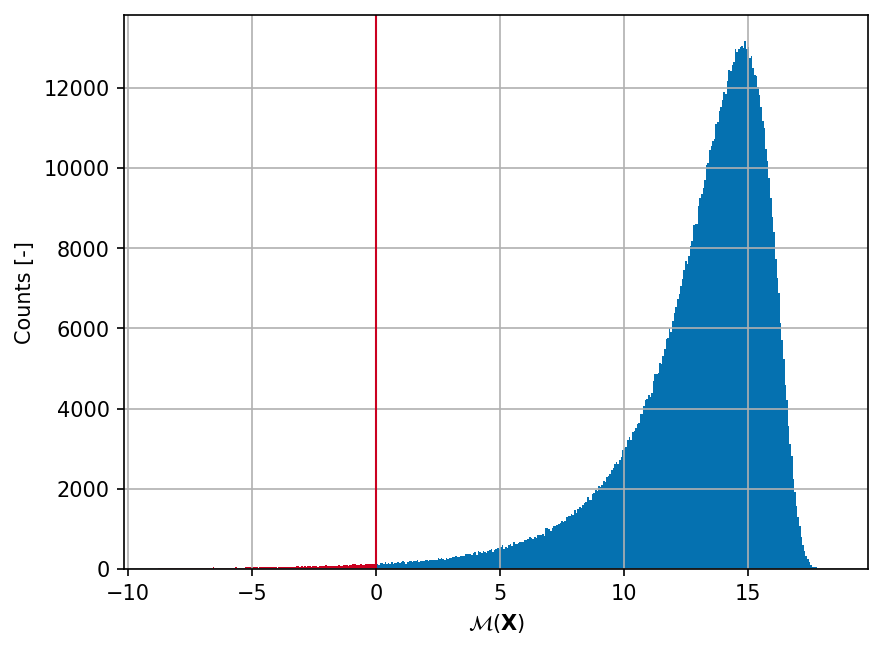

In [6]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    This is taken from:
    https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting
    
    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

xx_test = my_testfun.prob_input.get_sample(1000000)
yy_test = my_testfun(xx_test)
yy_test = yy_test[~is_outlier(yy_test, thresh=10)]
idx_pos = yy_test > 0
idx_neg = yy_test <= 0

hist_pos = plt.hist(yy_test, bins="auto", color="#0571b0")
plt.hist(yy_test[idx_neg], bins=hist_pos[1], color="#ca0020")
plt.axvline(0, linewidth=1.0, color="#ca0020")

plt.grid()
plt.ylabel("Counts [-]")
plt.xlabel("$\mathcal{M}(\mathbf{X})$")
plt.gcf().set_dpi(150);

### Failure probability ($P_f$)

Some reference values for the failure probability $P_f$ from the literature
are summarized in the table below.

|    Method    |   $N$    |       $\hat{P}_f$        | $\mathrm{CoV}[\hat{P}_f]$ |         Source          | Remark                                  |
|:------------:|:--------:|:------------------------:|:-------------------------:|:-----------------------:|-----------------------------------------|
| {term}`MCS`  |  $10^6$  |  $9.594 \times 10^{-3}$  |          &#8212;          |     {cite}`Li2018`      | &#8212;                                 |
| {term}`FORM` |   $27$   |  $9.88 \times 10^{-3}$   |          &#8212;          |     {cite}`Li2018`      | &#8212;                                 |
| {term}`FORM` | &#8212;  | $9.9031 \times 10^{-3}$  |          &#8212;          | {cite}`Rajashekhar1993` | &#8212;                                 |
| {term}`SORM` |   $32$   |  $9.88 \times 10^{-3}$   |          &#8212;          |     {cite}`Li2018`      | &#8212;                                 |
|  {term}`IS`  |  $10^3$  | $9.6071 \times 10^{-3}$  |          &#8212;          | {cite}`Rajashekhar1993` | Importance Sampling (IS)                |
|  {term}`IS`  | $9'312$  |  $1.00 \times 10^{-2}$   |          &#8212;          | {cite}`Schueremans2005` | &#8212;                                 |
|   IS + RS    | $2'192$  |  $9.00 \times 10^{-3}$   |          &#8212;          | {cite}`Schueremans2005` | IS + Response Surface (RS)              |
|   IS + SP    |  $358$   |  $1.00 \times 10^{-2}$   |          &#8212;          | {cite}`Schueremans2005` | IS + Splines (SP)                       |
|   IS + NN    |   $63$   |  $1.20 \times 10^{-2}$   |          &#8212;          | {cite}`Schueremans2005` | IS + Neural Networks (NN)               |
|      DS      |  $551$   |  $1.000 \times 10^{-2}$  |          &#8212;          | {cite}`Schueremans2005` | Directional sampling (DS)               |
|   DS + RS    |   $60$   |  $6.00 \times 10^{-3}$   |          &#8212;          | {cite}`Schueremans2005` | DS + Response Surface (RS)              |
|   DS + SP    |   $57$   |  $7.00 \times 10^{-3}$   |          &#8212;          | {cite}`Schueremans2005` | DS + Splines (SP                        |
|   DS + NN    |   $40$   |  $8.00 \times 10^{-3}$   |          &#8212;          | {cite}`Schueremans2005` | DS + Neural Networks (NN)               |
|     SSRM     |   $18$   |  $9.499 \times 10^{-3}$  |          &#8212;          |     {cite}`Li2018`      | Sequential surrogate reliability method |
|   Bucher's   | &#8212;  | $1.37538 \times 10^{-2}$ |          &#8212;          | {cite}`Rajashekhar1993` | &#8212;                                 |
| Approach A-0 | &#8212;  | $9.5410 \times 10^{-3}$  |          &#8212;          | {cite}`Rajashekhar1993` | &#8212;                                 |
| Approach A-1 | &#8212;  | $9.6398 \times 10^{-3}$  |          &#8212;          | {cite}`Rajashekhar1993` | &#8212;                                 |
| Approach A-2 | &#8212;  | $1.11508 \times 10^{-2}$ |          &#8212;          | {cite}`Rajashekhar1993` | &#8212;                                 |
| Approach A-3 | &#8212;  | $9.5410 \times 10^{-3}$  |          &#8212;          | {cite}`Rajashekhar1993` | &#8212;                                 |

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Eq. (10), p. 213 in {cite}`Rajashekhar1993`.